In [1]:
!nvidia-smi

Thu Dec 28 11:34:18 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070        Off | 00000000:01:00.0  On |                  N/A |
| 33%   35C    P8              20W / 220W |    104MiB /  8192MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# preparar algunas funciones para el programa

In [2]:
import zipfile, os

def descomprimir_zip(archivo_zip, directorio_destino):
    try:
        with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
            zip_ref.extractall(directorio_destino)
        print("¡Archivo ZIP descomprimido correctamente!")
    except zipfile.BadZipFile:
        print("Error: El archivo proporcionado no es un archivo ZIP válido.")
    except Exception as e:
        print(f"Error al descomprimir el archivo ZIP: {e}")




#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
Setup complete ✅ (6 CPUs, 31.2 GB RAM, 115.4/467.9 GB disk)


# setear los directorios de trabajo

In [4]:
BORRAR_CONTENIDO_FOLDER = False

In [5]:
if BORRAR_CONTENIDO_FOLDER:
    !rm -rf /content

In [6]:
%cd /content

HOME = os.getcwd()

!mkdir {HOME}/datasets
%cd {HOME}/datasets

print(HOME)

/usr/local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/content
/content/datasets
/content


# elegir un dataset para entrenar

## ver los datasets disponibles para entrenar

In [7]:
!ls /datasets

 json_to_yolo.py
 materials_seg_ARRAM.zip
 orient.zip
 orient_train.zip
 parts_seg_eyesDcar.zip
'project_arram materiales-2023_12_13_15_56_00-cvat for images 1.1.zip'


In [8]:
!ls /content

CVAT  datasets


## elegir un dataset

In [9]:
NOMBRE_DATASET_USAR = "materials_seg_ARRAM"

## descomprimir el dataset para realizar el entrenamiento

In [10]:
import os
os.makedirs(f"/content/datasets/{NOMBRE_DATASET_USAR}", exist_ok=True)

%cp "/datasets/{NOMBRE_DATASET_USAR}.zip" "/content/datasets/{NOMBRE_DATASET_USAR}/dataset.zip"


class dataset:
    location = f"/content/datasets/{NOMBRE_DATASET_USAR}"


# Uso del ejemplo:
archivo_zip = f"/content/datasets/{NOMBRE_DATASET_USAR}/dataset.zip"  # Ruta y nombre del archivo ZIP que quieres descomprimir
directorio_destino = f'/content/datasets/{NOMBRE_DATASET_USAR}'  # Ruta del directorio donde se extraerán los archivos

descomprimir_zip(archivo_zip, f"{directorio_destino}")

¡Archivo ZIP descomprimido correctamente!


In [11]:
import os
image_demo = os.listdir(f"{dataset.location}/test/images/")[0]
image_demo

'DJI_0932_000145.jpg'

In [12]:
#%cd {HOME}
#!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source="/content/test/images/" + {image_demo} save=true

In [13]:
image = f"runs/segment/predict/{image_demo}"
#Image(filename=image, height=50)

# entrenar

In [14]:
!ls {dataset.location}/data.yaml

/content/datasets/materials_seg_ARRAM/data.yaml


In [17]:
BATCH = 12 # ajustar hasta ocupar el maximo de la GPU posible
EPOCHS = 50

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs={EPOCHS} imgsz=800 plots=True batch={BATCH} save=true

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/datasets/materials_seg_ARRAM/data.yaml, epochs=50, patience=50, batch=12, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal

In [26]:
TRAIN_NUMBER="train" if len(os.listdir("runs/segment/")) == 1 else f'train{len(os.listdir("runs/segment/"))}"'
TRAIN_NUMBER

'train'

# opcional

## ver resultados del entrenamiento [opcional]

In [34]:
BASE_RESULT = f"{HOME}/runs/segment/{TRAIN_NUMBER}"

In [35]:
!ls {BASE_RESULT}

BoxF1_curve.png					     results.png
BoxPR_curve.png					     train_batch0.jpg
BoxP_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
MaskF1_curve.png				     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskP_curve.png					     val_batch1_labels.jpg
MaskR_curve.png					     val_batch1_pred.jpg
args.yaml					     val_batch2_labels.jpg
confusion_matrix.png				     val_batch2_pred.jpg
events.out.tfevents.1703750017.b1c0007c9843.21851.0  weights
results.csv


/content


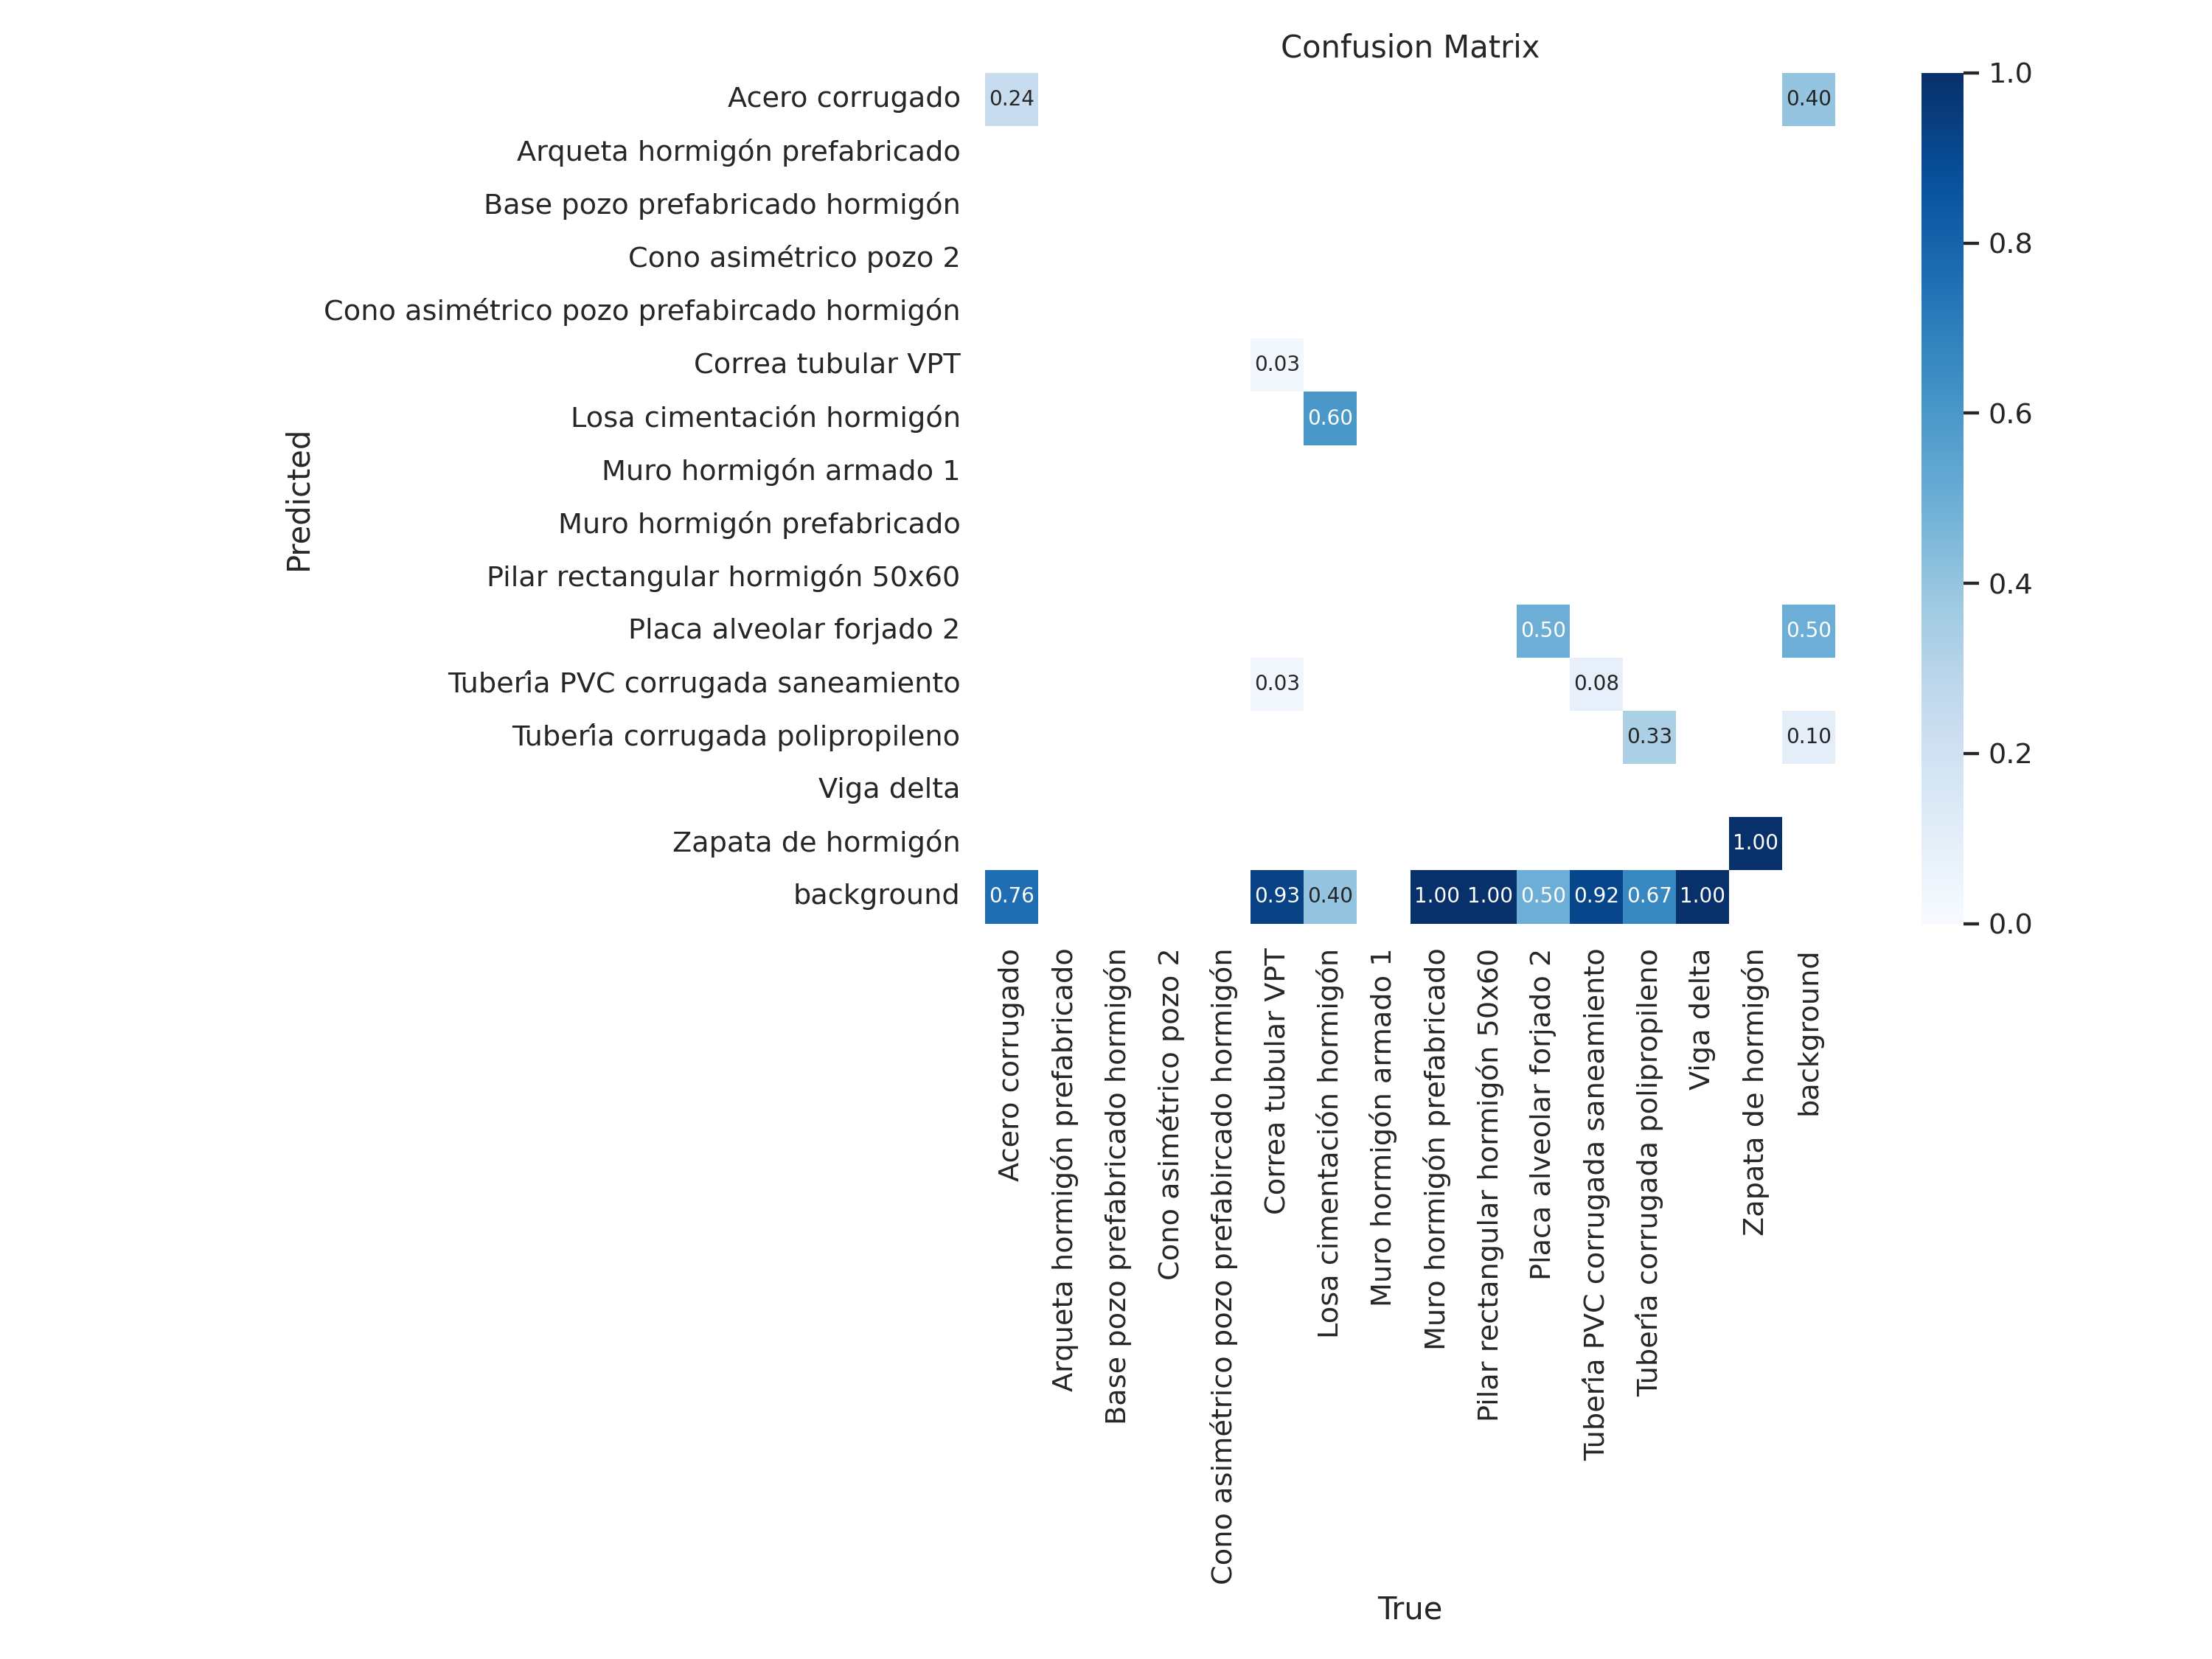

In [36]:
%cd {HOME}
Image(filename=f'{BASE_RESULT}/confusion_matrix.png', width=1100)

/content


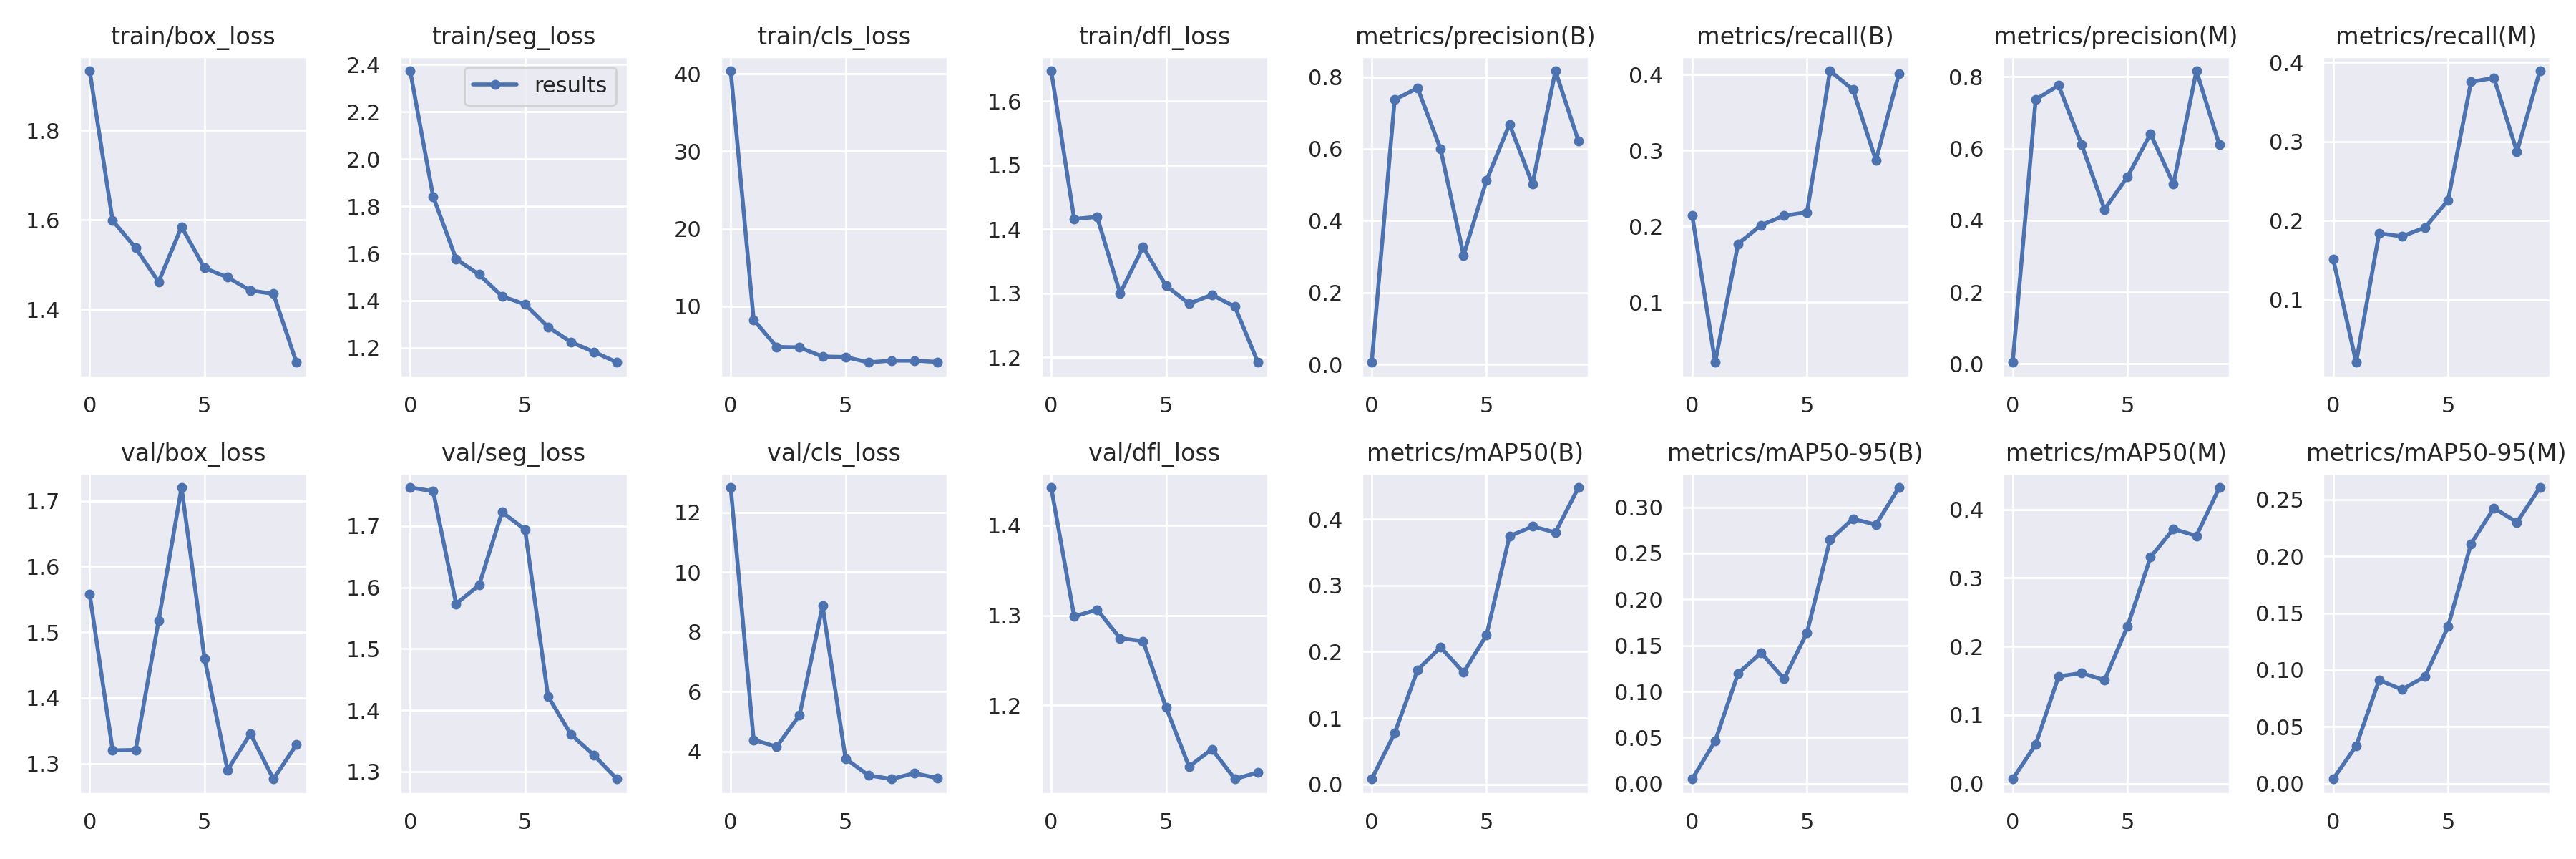

In [37]:
%cd {HOME}
Image(filename=f'{BASE_RESULT}/results.png', width=1100)

/content


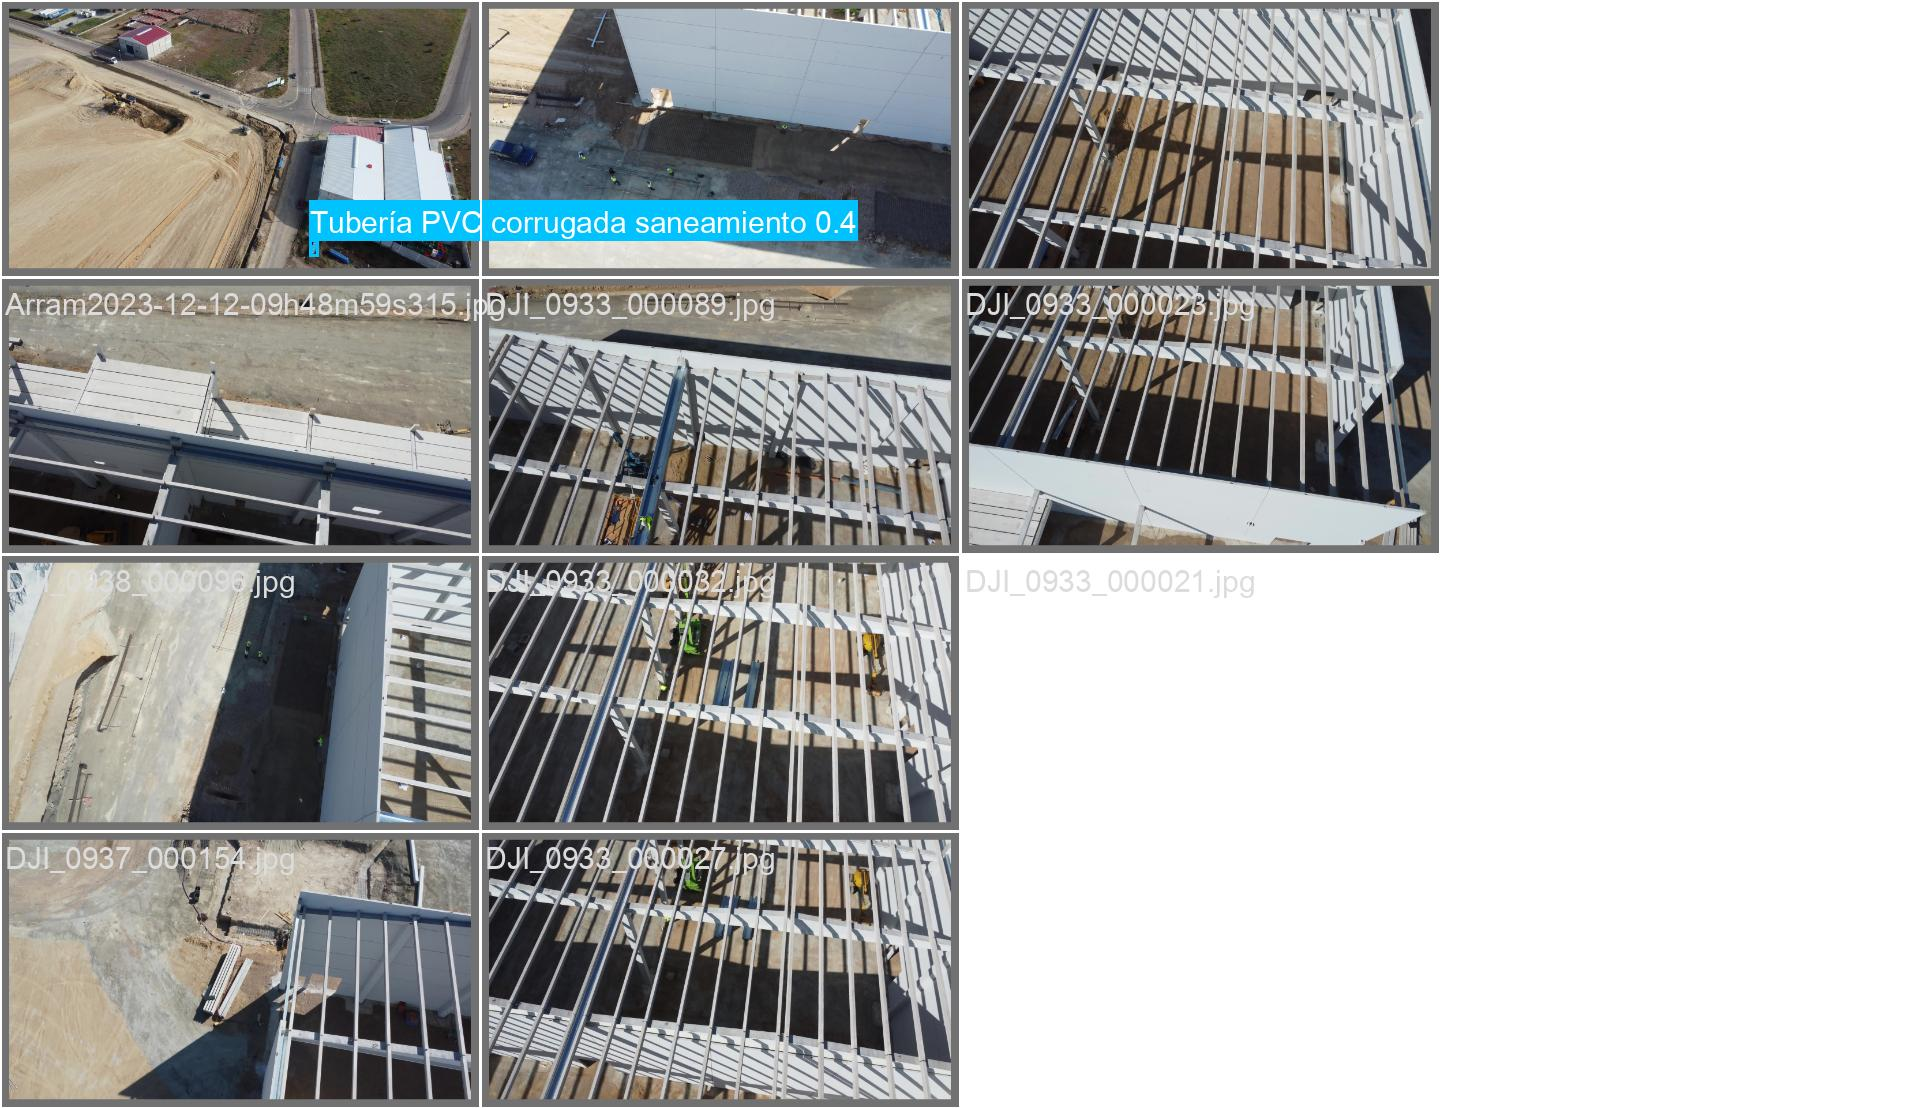

In [38]:
%cd {HOME}
Image(filename=f'{BASE_RESULT}/val_batch0_pred.jpg', width=1100)

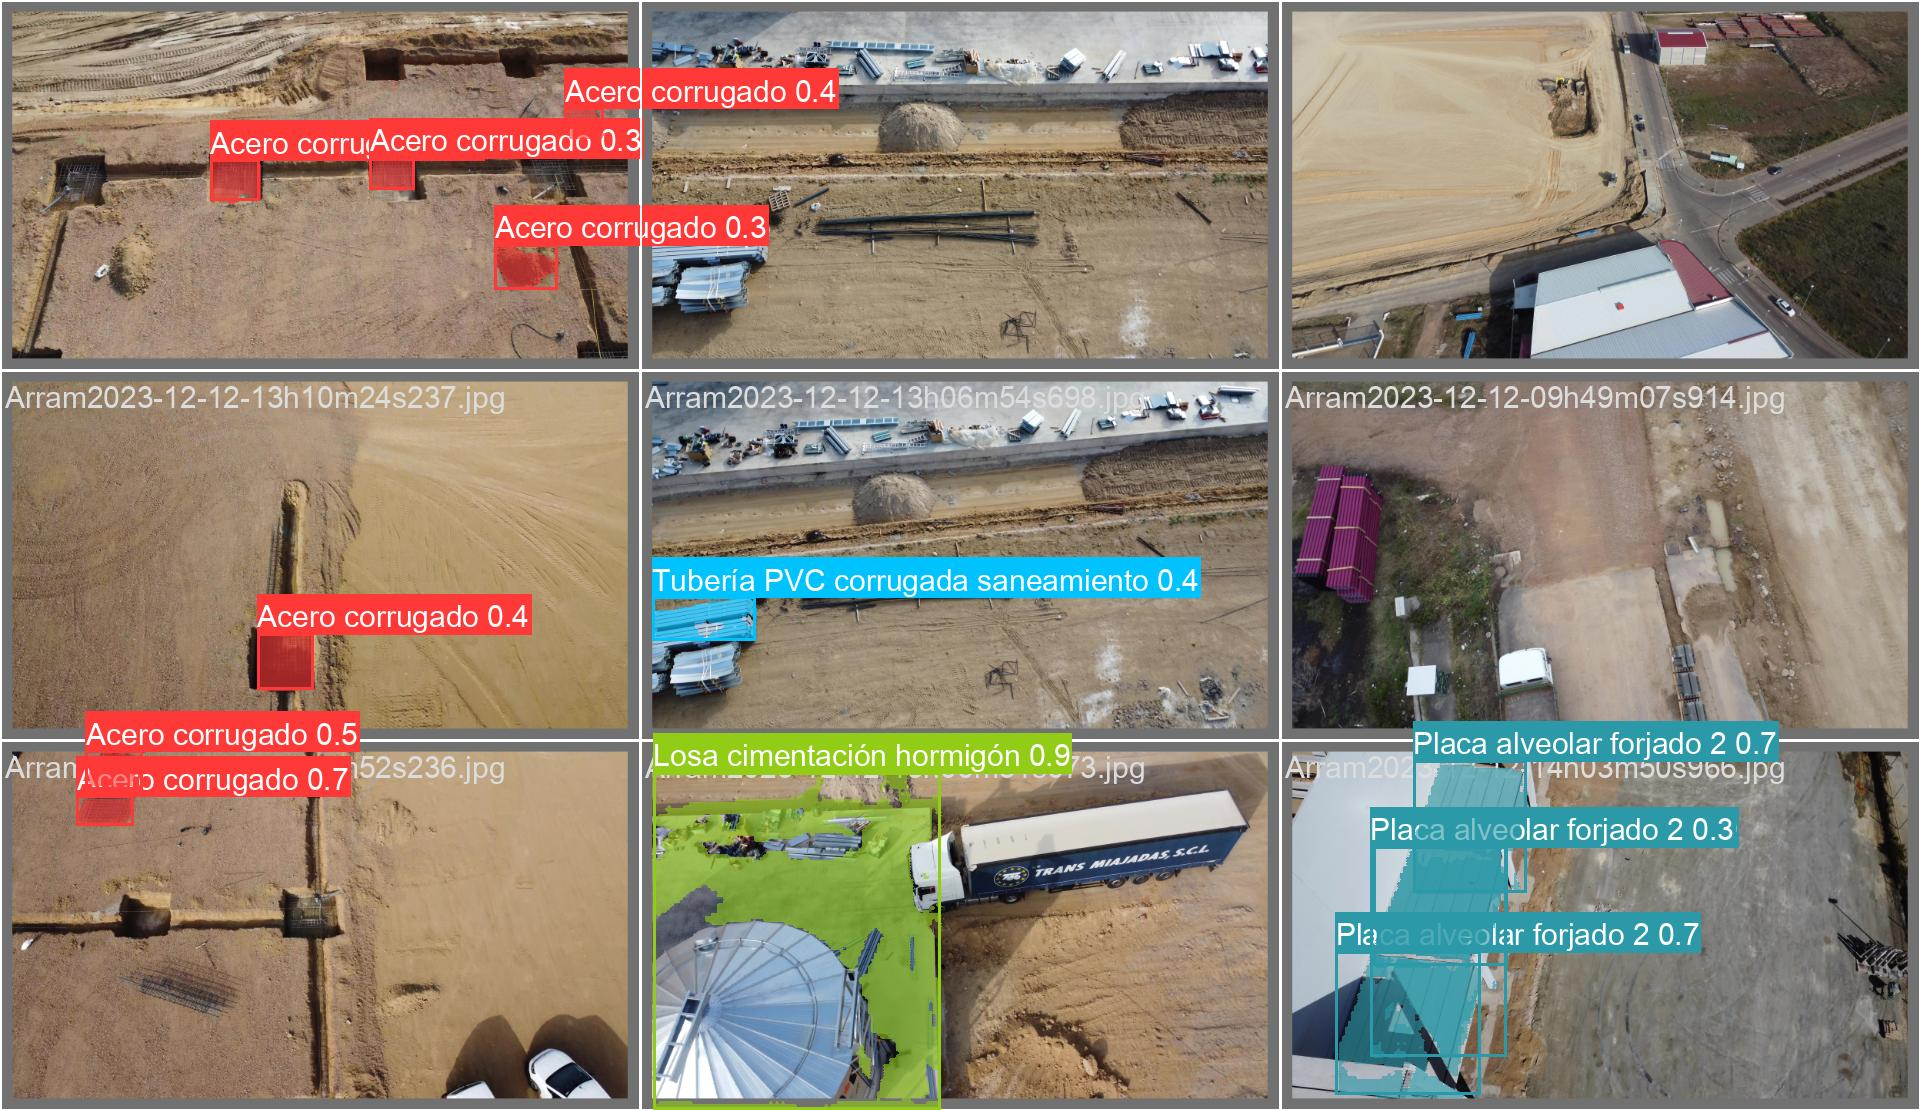

In [39]:
Image(filename=f'{BASE_RESULT}/val_batch2_pred.jpg', width=1100)

## validar el entrenamiento [opcional]

In [41]:
%cd {HOME}

!yolo task=detect mode=val model={BASE_RESULT}/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 29 images, 11 backgrounds,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         29        163      0.622      0.401      0.448      0.322       0.61      0.389      0.432       0.26
       Acero corrugado         29         50      0.605      0.337      0.481      0.262      0.641      0.357      0.502      0.249
    Correa tubular VPT         29         29      0.151      0.138      0.141     0.0881          0          0     0.0169    0.00542
Losa cimentación hormigón         29          5      0.784      0.737       0.88      0.667      0.784      0.737       0.88      0.449
Muro hormigón prefabricado         29          8          1          0     0.0885     0.0604          1

## realizar una prueba del entrenamiento realizado [opcional]

In [43]:
!ls {dataset.location}/test/images

Arram2023-12-12-09h50m38s389.jpg  DJI_0932_000071.jpg
Arram2023-12-12-13h03m39s460.jpg  DJI_0932_000074.jpg
Arram2023-12-12-13h09m25s104.jpg  DJI_0932_000145.jpg
Arram2023-12-12-13h09m47s218.jpg  DJI_0932_000147.jpg
Arram2023-12-12-13h10m39s095.jpg  DJI_0932_000149.jpg
Arram2023-12-12-13h10m43s785.jpg  DJI_0933_000092.jpg
Arram2023-12-12-13h11m54s681.jpg  DJI_0933_000099.jpg
Arram2023-12-12-13h11m55s983.jpg  DJI_0937_000152.jpg
Arram2023-12-12-13h12m28s699.jpg  DJI_0937_000156.jpg
Arram2023-12-12-13h12m29s497.jpg  DJI_0938_000050.jpg
Arram2023-12-12-13h15m45s887.jpg  DJI_0938_000093.jpg
Arram2023-12-12-13h16m35s540.jpg  DJI_0938_000094.jpg
Arram2023-12-12-14h03m43s122.jpg  DJI_0938_000123.jpg
Arram2023-12-12-14h30m58s181.jpg  DJI_0939_000019.jpg
DJI_0932_000041.jpg


In [42]:
%cd {HOME}
!yolo task=detect mode=predict model={BASE_RESULT}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 7966MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/site-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/ultralytics/yolo/engine/model.py", line 146, in predict
    return self.predictor(source=source, stream=stream, verbose=verbose)
  File "/usr/local/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/site-packages/ultralytics/yolo/engine/pre

# Guardar los resultados [obligatorio]

In [44]:
import shutil
shutil.make_archive('train','zip', f"{HOME}/runs/detect/{TRAIN_NUMBER}/")
%cp /content/train.zip /datasets/{NOMBRE_DATASET_USAR}_train.zip

print("Resultados guardados en:")
print(f"http://192.168.1.35:4443/files/{NOMBRE_DATASET_USAR}_train.zip")

Resultados guardados en:
http://192.168.1.35:4443/files/materials_seg_ARRAM_train.zip
